<a href="https://colab.research.google.com/github/evangrinalds/data-science/blob/main/familypromise_datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Clean/Prepare Data



In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/JayAdamo/FamilyPromise/master/DAM_July28_2020_redacted.csv')

!pip install category_encoders==2.*

     |████████████████████████████████| 81kB 3.1MB/s 


In [ ]:
df.head(2)

,2.1 Organization Name,2.2 Project Name,2.4 ProjectType,2.5 Utilization Tracking Method (Invalid),2.6 Federal Grant Programs,Enrollment Created By,5.8 Personal ID,5.9 Household ID,3.15 Relationship to HoH,3.16 Client Location,CaseMembers,3.10 Enroll Date,3.11 Exit Date,3.12 Exit Destination,3.2 Social Security Quality,3.3 Birthdate,3.3 Birthdate Quality,Age at Enrollment,Current Age,3.4 Race,3.5 Ethnicity,3.6 Gender,3.7 Veteran Status,3.8 Disabling Condition at Entry,3.917 Living Situation,3.917b Stayed Less Than 7 Nights,3.917 Stayed Less Than 90 Days,"3.917b Stayed in Streets, ES or SH Night Before",3.917 Length of Stay,3.917 Homeless Start Date,Length of Time Homeless (3.917 Approximate Start),3.917 Times Homeless Last 3 Years,3.917 Total Months Homeless Last 3 Years,V5 Last Permanent Address,V5 State,V5 Zip,Municipality (City or County),Days Enrolled in Project,RRH In Permanent Housing,RRH Date Of Move-In,...,4.09 Mental Health Problem,4.05 Physical Disability,CaseChildren,CaseAdults,Bed Nights During Report Period,Count of Bed Nights - Entire Episode,HEN-HP Referral Most Recent,HEN-RRH Referral Most Recent,WorkSource Referral Most Recent,YAHP Referral Most Recent,4.04.10 Other Public,4.04.10 State Funded,4.04.11 Indian Health Services (IHS),4.04.12 Other,4.04.3 Combined Childrens HealthInsurance/Medicaid,4.04.3 Medicaid,4.04.4 Medicare,4.04.5 State Children's health Insurance S-CHIP,4.04.6 Veteran's Administration Medical Services,4.04.8 Health Insurance obtained through COBRA,4.04.7 Private - Employer,4.04.9 Private,4.04.9 Private - Individual,4.2.3a Earned Income,4.2.4b Unemployment Insurance,4.2.5c Supplemental Security Income,4.2.6d Social Security Disability Income,4.2.7e VA Disability Compensation,4.2.8f VA Disability Pension,4.2.9g Private Disability Income,4.2.10h Workers Compensation,4.2.11i TANF,4.2.12j General Assistance,4.2.13k Retirement (Social Security),4.2.14l Pension from a Former Job,4.2.15m Child Support,4.2.16n Alimony,4.2.17o Other Income,Chronic Homeless Status_vHMISDatAssessment,Chronic Homeless Status_EvaluatevHMIS&HMISDA
0,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,Lynnetta Lewis,56550,92775,Son,NaN,6,9/10/2017 12:00 AM,1/8/2018 12:00 AM,No exit interview completed,Client Refused,1/1/2013 12:00 AM,Full DOB Reported,4,7,White,Non-Hispanic/Latino,Male,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,NaN,NaN,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0
1,Family Promise of Spokane,FPS--ES--Bridges Family Shelter,Emergency shelter,Entry/Exit (e/e),NaN,Lynnetta Lewis,36138,92775,Self,Spokane City & County CoC,6,9/10/2017 12:00 AM,1/8/2018 12:00 AM,No exit interview completed,Full SSN,11/13/1988 12:00 AM,Full DOB Reported,28,31,White,Non-Hispanic/Latino,Male,No,Missing,Hotel or motel paid for without emergency shel...,NaN,NaN,NaN,"One month or more, but less than 90 days",11/1/2014 12:00 AM,1164.0,Three times,More than 12 months,Data not collected,NaN,NaN,NaN,120,NaN,NaN,...,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,No,No,No,No,No,No,No,No,No,No,No,1300.0,0,0.0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0


In [ ]:
# Renaming column headers for easier access/readability

df = df.rename(columns={'2.1 Organization Name':'org_name',
                        '2.2 Project Name':'project_name',
                        '2.4 ProjectType':'project_type',
                        '2.5 Utilization Tracking Method (Invalid)':'util_track_method',
                        '2.6 Federal Grant Programs':'fed_grant_programs',
                        'Enrollment Created By':'enrollment_created_by',
                        '3.1 FirstName':'first_name','3.1 LastName':'last_name',
                        '5.8 Personal ID':'personal_id','5.9 Household ID':'case_id',
                        '3.15 Relationship to HoH':'relationship_to_HoH',
                        '3.16 Client Location':'client_location','CaseMembers':'case_members',
                        '3.10 Enroll Date':'enroll_date','3.11 Exit Date':'exit_date',
                        '3.12 Exit Destination':'exit_destination','3.2 SocSecNo':'ssn',
                        '3.2 Social Security Quality':'ssn_quality','3.3 Birthdate':'dob',
                        '3.3 Birthdate Quality':'dob_quality','Age at Enrollment':'age_at_enrollment',
                        'Current Age':'current_age','3.4 Race':'race','3.5 Ethnicity':'ethnicity',
                        '3.6 Gender':'gender','3.7 Veteran Status':'vet_status',
                        '3.8 Disabling Condition at Entry':'disabling_cond_at_entry',
                        '3.917 Living Situation':'living_situation',
                        '3.917b Stayed Less Than 7 Nights':'stayed_7_or_less',
                        '3.917 Stayed Less Than 90 Days':'stayed_90_or_less',
                        '3.917b Stayed in Streets, ES or SH Night Before':'stayed_street_ES_or_SH_night_before',
                        '3.917 Length of Stay':'length_of_stay',
                        '3.917 Homeless Start Date':'homeless_start_date',
                        'Length of Time Homeless (3.917 Approximate Start)':'length_of_time_homeless',
                        '3.917 Times Homeless Last 3 Years':'times_homeless_last_3years',
                        '3.917 Total Months Homeless Last 3 Years':'total_months_homeless',
                        'V5 Last Permanent Address':'last_perm_address',
                        'V5 Prior Address':'prior_address','V5 State':'state',
                        'V5 Zip':'zip','Municipality (City or County)':'municipality',
                        'Days Enrolled in Project':'days_enrolled_in_project',
                        'RRH In Permanent Housing':'rrh_in_perm_housing',
                        'RRH Date Of Move-In':'rrh_date_of_move-in',
                        'Days Enrolled Until RRH Date of Move-in':'days_enrolled_until_rrh_movein',
                        '4.1 Housing Status':'housing_status',
                        '4.4 Covered by Health Insurance':'covered_by_health_insurance',
                        '4.11 Domestic Violence':'domestic_violence',
                        '4.11 Domestic Violence - Currently Fleeing DV?':'currently_fleeing',
                        '4.11 Domestic Violence - When it Occurred':'when_dv_occured',
                        '4.13 Engagement Date':'engagement_date',
                        'Days Enrolled Until Engagement Date':'days_enrolled_until_engaged',
                        '4.24 Current Status (Retired Data Element)':'current_status',
                        '4.24 In School (Retired Data Element)':'in_school',
                        '4.24 Connected to McKinney Vento Liason (Retired)':'connected_to_MVento',
                        'Household Type':'household_type',
                        'Latitude':'latitude','Longitude':'longitude',
                        'R1 Referral Source':'referal_source',
                        'R2 Date Status Determined':'date_status_determined',
                        'R2 Enroll Status':'enroll_status',
                        'R2 Runaway Youth':'runaway_youth',
                        'R2 Reason Why No Services Funded':'reason_why_no_services_funded',
                        'R3 Sexual Orientation':'sexual_orientation',
                        'R4 Last Grade Completed':'last_grade_completed',
                        'R5 School Status':'school_status',
                        'R6 Employed Status':'employed_status',
                        'R6 Why Not Employed':'reason_not_employed',
                        'R6 Type of Employment':'type_of_employment',
                        'R6 Looking for Work':'looking_for_work',
                        'R7 General Health Status':'general_health_status',
                        'R8 Dental Health Status':'dental_health_status',
                        'R9 Mental Health Status':'mental_health_status',
                        'R10 Pregnancy Status':'pregnancy_status',
                        'R10 Pregnancy Due Date':'pregnancy_due_date',
                        'Client Record Restricted':'client_record_restricted',
                        'InfoReleaseNo':'infoReleaseNo',
                        'Information Release Status':'info_release_status',
                        '4.12 Contact Services':'contact_services',
                        'Date of Last Contact (Beta)':'date_of_last_contact',
                        'Date of First Contact (Beta)':'date_of_first_contact',
                        'Count of Bed Nights (Housing Check-ins)':'housing_checkins',
                        'Date of Last ES Stay (Beta)':'date_of_last_stay',
                        'Date of First ES Stay (Beta)':'date_of_first_stay',
                        '4.2 Income Total at Entry':'income_at_entry',
                        '4.02 Total Income at Annual Update':'income_at_update',
                        '4.2 Income Total at Exit':'income_at_exit',
                        '4.3 Non-Cash Benefit Count':'non-cash_benefit_count',
                        '4.3 Non-Cash Benefit Count at Exit':'non-cash_count_at_exit',
                        'CurrentDate':'current_date',
                        'Barrier Count at Entry':'barrier_count_at_entry',
                        'Chronic Homeless Status':'chronic_homeless_status',
                        'ProgramType':'program_type',
                        'SOAR Eligibility Determination (Most Recent)':'soar_eligibility',
                        'SOAR Enrollment Determination (Most Recent)':'soar_enrollment',
                        'RRH | Most Recent Enrollment':'most_recent_rrh',
                        'Street Outreach | Most Recent Enrollment':'most_recent_street_outreach',
                        'Coordinated Entry | Most Recent Enrollment':'most_recent_CE',
                        'Emergency Shelter | Most Recent Enrollment':'most_recent_ES',
                        'Transitional Housing | Most Recent Enrollment':'most_recent_trans',
                        'PSH | Most Recent Enrollment':'most_recent_PSH',
                        'Prevention | Most Recent Enrollment':'most_recent_prevention',
                        'Under 25 Years Old':'under_25',
                        'ClientID':'client_id',
                        '4.10 Alcohol Abuse (Substance Abuse)':'alcohol_abuse',
                        '4.07 Chronic Health Condition':'chronic_health_condition',
                        '4.06 Developmental Disability':'developmental_disability',
                        '4.10 Drug Abuse (Substance Abuse)':'substance_abuse',
                        '4.08 HIV/AIDS':'HIV_AIDS',
                        '4.09 Mental Health Problem':'mental_health_problem',
                        '4.05 Physical Disability':'physical_disability',
                        'CaseChildren':'case_children','CaseAdults':'case_adults',
                        'Bed Nights During Report Period':'bednights_during_report_period',
                        'Count of Bed Nights - Entire Episode':'entire_episode_bednights',
                        'HEN-HP Referral Most Recent':'most_recent_HEN-HP',
                        'HEN-RRH Referral Most Recent':'most_recent_HEN-RRH',
                        'WorkSource Referral Most Recent':'most_recent_worksource',
                        'YAHP Referral Most Recent':'most_recent_YAHP',
                        '4.04.10 Other Public':'other_public',
                        '4.04.10 State Funded':'state_funded',
                        '4.04.11 Indian Health Services (IHS)':'indian_health_services',
                        '4.04.12 Other':'other',
                        '4.04.3 Combined Childrens HealthInsurance/Medicaid':'combined_childrens_health_insurance',
                        '4.04.3 Medicaid':'medicaid','4.04.4 Medicare':'medicare',
                        "4.04.5 State Children's health Insurance S-CHIP":'CHIP',
                        "4.04.6 Veteran's Administration Medical Services":'VAMS',
                        '4.04.8 Health Insurance obtained through COBRA':'COBRA',
                        '4.04.7 Private - Employer':'Private_employer',
                        '4.04.9 Private':'private','4.04.9 Private - Individual':'private_individual',
                        '4.2.3a Earned Income':'earned_income',
                        '4.2.4b Unemployment Insurance':'unemployement_income',
                        '4.2.5c Supplemental Security Income':'supplemental_security_income',
                        '4.2.6d Social Security Disability  Income':'social_security_disability_income',
                        '4.2.7e VA Disability Compensation':'VA_disability_compensation',
                        '4.2.8f VA Disability Pension':'VA_disability_pension',
                        '4.2.9g Private Disability Income':'private_disability_income',
                        '4.2.10h Workers Compensation':'workers_compensation',
                        '4.2.11i TANF':'TANF','4.2.12j General Assistance':'general_assistance',
                        '4.2.13k Retirement (Social Security)':'retirement_social_security',
                        '4.2.14l Pension from a Former Job':'pension_from_former_job',
                        '4.2.15m Child Support':'child_support',
                        '4.2.16n Alimony':'alimony',
                        '4.2.17o Other Income':'other_income',
                        'Chronic Homeless Status_vHMISDatAssessment':'chronic_homeless_status_assessment',
                        'Chronic Homeless Status_EvaluatevHMIS&HMISDA':'chronic_homeless_status_evaluation',
                        'Service':'service','Service Date':'service_date',})

In [ ]:
df.nunique()

org_name                               1
project_name                           2
project_type                           1
util_track_method                      2
fed_grant_programs                     0
                                      ..
child_support                         15
alimony                                1
other_income                          11
chronic_homeless_status_assessment     2
chronic_homeless_status_evaluation     2
Length: 145, dtype: int64

In [ ]:
# Format Date/Time

df['enroll_date'] = pd.to_datetime(df['enroll_date'], infer_datetime_format=True)
df['exit_date'] = pd.to_datetime(df['exit_date'], infer_datetime_format=True)
df['dob'] = pd.to_datetime(df['dob'], infer_datetime_format=True)
df['homeless_start_date'] = pd.to_datetime(df['homeless_start_date'], infer_datetime_format=True)
df['engagement_date'] = pd.to_datetime(df['engagement_date'], infer_datetime_format=True)
df['date_of_last_contact'] = pd.to_datetime(df['date_of_last_contact'], infer_datetime_format=True)
df['date_of_first_contact'] = pd.to_datetime(df['date_of_first_contact'], infer_datetime_format=True)
df['date_of_last_stay'] = pd.to_datetime(df['date_of_last_stay'], infer_datetime_format=True)
df['date_of_first_stay'] = pd.to_datetime(df['date_of_first_stay'], infer_datetime_format=True)
df['current_date'] = pd.to_datetime(df['current_date'], infer_datetime_format=True)

In [ ]:
!pip install pandas-profiling==2.*

     |████████████████████████████████| 266kB 4.3MB/s 
     |████████████████████████████████| 3.1MB 8.9MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 604kB 40.3MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 296kB 42.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=439128d0049fcca818348e2fadcf6e49988ef1642c33a388bd62139ab5af6ea5
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=a530a1bfa6b6cced0de17df40a33d8a813dc56ef2cc83722cccaf6e58d5adcf8
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

#### Engineer new feature to predict target

In [ ]:
df['exit_destination'].value_counts()

Emergency shelter, including hotel or motel paid for with emergency shelter voucher, or RHY-funded Host Home shelter             383
No exit interview completed                                                                                                      269
Client refused                                                                                                                   219
Rental by client with RRH or equivalent subsidy                                                                                  196
Rental by client, no ongoing housing subsidy                                                                                     131
Rental by client, other ongoing housing subsidy                                                                                  119
Transitional Housing for homeless persons (including homeless youth)                                                              84
Staying or living with family, permanent tenure                      

In [ ]:
yes = ['Rental by client with RRH or equivalent subsidy', 
                'Rental by client, no ongoing housing subsidy', 
                'Staying or living with family, permanent tenure', 
                'Rental by client, other ongoing housing subsidy',
                'Permanent housing (other than RRH) for formerly homeless persons', 
                'Staying or living with friends, permanent tenure', 
                'Owned by client, with ongoing housing subsidy',
                'Owned by client, no ongoing housing subsidy',
                'Staying or living with friends, permanent tenure', 
                'Rental by client, VASH housing Subsidy'
               ]
no = ['Staying or living with family, temporary tenure (e.g., room, apartment or house)', 
               'Staying or living with friends, temporary tenure (e.g., room, apartment or house)', 
               'Emergency shelter, including hotel or motel paid for with emergency shelter voucher, or RHY-funded Host Home shelter',
                'Place not meant for habitation (e.g., a vehicle, an abandoned building, bus/train/subway station/airport or anywhere outside)',
                 'Hotel or Motel paid for without Emergency Shelter Voucher', 'Other', 'Substance Abuse Treatment or Detox Center',
                 'Foster Care Home or Foster Care Group Home', 'Psychiatric Hospital or Other Psychiatric Facility',
                 'Transitional Housing for homeless persons (including homeless youth)',
                  'Client refused', 'No exit interview completed', 'nan'
                  ]

In [ ]:
import numpy as np
col = 'exit_destination'
conditions = [df[col].isin(yes), df[col].isin(no)]
choices = ['1', '0',]
df['perm_exit'] = np.select(conditions, choices)                     

In [ ]:
df['perm_exit'].value_counts()

0    1235
1     583
Name: perm_exit, dtype: int64

#### Set Features / Target

In [ ]:
df = df.filter(['age_at_enrollment', 'case_members','earned_income', 'perm_exit'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25)

In [ ]:
train, val = train_test_split(train, random_state=42)

In [ ]:
train.shape, val.shape, test.shape

((1022, 4), (341, 4), (455, 4))

In [ ]:
# Arrange data into X features matrix and y target vector

features = ['age_at_enrollment', 'case_members', 'earned_income']
target = ['perm_exit']

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [ ]:
df

,age_at_enrollment,case_members,earned_income,perm_exit
0,4,6,0.0,0
1,28,6,1300.0,0
2,10,6,0.0,0
3,5,6,0.0,0
4,27,6,1200.0,0
...,...,...,...,...
1813,1,3,0.0,0
1814,34,4,0.0,0
1815,12,4,0.0,0
1816,6,4,0.0,0


#### Baseline for binary classification

In [ ]:
# Baseline Accuracy
target = 'perm_exit'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.695695
1    0.304305
Name: perm_exit, dtype: float64

In [ ]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
y_pred[:5]

['0', '0', '0', '0', '0']

In [ ]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# Check shape after encoding
X_train_encoded.shape, X_val_encoded.shape

((1022, 3), (341, 3))

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [ ]:
X_val_imputed[:5]  # Slice to the first 5 observations

array([[36.,  3.,  0.],
       [11.,  3.,  0.],
       [22.,  4.,  0.],
       [ 3.,  2.,  0.],
       [ 0.,  4.,  0.]])

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [ ]:
X_val_scaled[:5]

array([[ 1.03366646, -0.46063462, -0.19326667],
       [-0.56636856, -0.46063462, -0.19326667],
       [ 0.13764685,  0.22964189, -0.19326667],
       [-1.07837977, -1.15091112, -0.19326667],
       [-1.27038397,  0.22964189, -0.19326667]])

In [ ]:
# Fit our model!
model = LogisticRegressionCV()
model.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
# Predicting score
model.score(X_train_scaled, y_train)

0.6956947162426614

#### Random Forest

In [ ]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Accuracy', pipeline.score(X_train, y_train))

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Accuracy 0.7759295499021527


#### XG Boost

In [ ]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100,
                  random_state=42,
                  n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
      

In [ ]:
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.7064579256360078
Validation Accuracy: 0.6334310850439883


#### Permutation Importances

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=20, 
                           random_state=42, 
                           n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train);

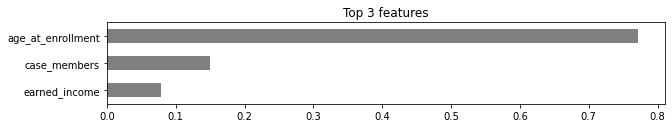

In [ ]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 3
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

#### Neural Net

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Binary classification)
import pandas as pd
from sklearn.preprocessing import StandardScaler

df

,age_at_enrollment,case_members,earned_income,perm_exit
0,4,6,0.0,0
1,28,6,1300.0,0
2,10,6,0.0,0
3,5,6,0.0,0
4,27,6,1200.0,0
...,...,...,...,...
1813,1,3,0.0,0
1814,34,4,0.0,0
1815,12,4,0.0,0
1816,6,4,0.0,0


In [ ]:
# Implement a Multilayer Perceptron architecture of your choosing using the Keras library.

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model3 = Sequential(
      [
       Dense(32, activation='relu', input_dim=2),
       Dense(32, activation='relu'),
       Dense(1, activation='sigmoid')       
      ]
)
  model3.compile(optimizer=opt, loss='binary_crossentropy',
                metrics=['accuracy'])
  return model3

In [ ]:
# Train your model
model3 = create_model()

bt_normal = model3.fit(X_train, y_train, 
                       epochs=25, 
                       batch_size=32, 
                       validation_data=(X_train, y_train))

Epoch 1/25


ValueError: ignored